In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import time

In [2]:
class RIPRouter:
    def __init__(self, router_id):
        self.router_id = router_id
        self.routing_table = {router_id: (0, router_id)}
        self.neighbors = {}
    
    def add_neighbor(self, neighbor_id, cost):
        self.neighbors[neighbor_id] = cost
        self.routing_table[neighbor_id] = (cost, neighbor_id)
    
    def update_routing_table(self, neighbor_id, neighbor_table):
        updated = False
        direct_cost = self.neighbors[neighbor_id]
        
        for dest, (cost, next_hop) in neighbor_table.items():
            if dest == self.router_id:
                continue
            
            new_cost = direct_cost + cost
            
            if new_cost > 15:
                new_cost = 16
            
            if dest not in self.routing_table or new_cost < self.routing_table[dest][0]:
                self.routing_table[dest] = (new_cost, neighbor_id)
                updated = True
        
        return updated
    
    def get_routing_table(self):
        return self.routing_table.copy()
    
    def display_routing_table(self):
        print(f"\nRouting Table for Router {self.router_id}:")
        print("-" * 50)
        print(f"{'Destination':<15} {'Cost':<10} {'Next Hop':<15}")
        print("-" * 50)
        for dest in sorted(self.routing_table.keys()):
            cost, next_hop = self.routing_table[dest]
            if cost >= 16:
                cost_str = "Unreachable"
            else:
                cost_str = str(cost)
            print(f"{dest:<15} {cost_str:<10} {next_hop:<15}")
        print("-" * 50)

In [3]:
def simulate_rip(topology):
    routers = {}
    
    for router_id in topology.keys():
        routers[router_id] = RIPRouter(router_id)
    
    for router_id, neighbors in topology.items():
        for neighbor_id, cost in neighbors.items():
            routers[router_id].add_neighbor(neighbor_id, cost)
    
    print("Starting RIP Simulation...")
    print("=" * 60)
    
    max_iterations = 20
    iteration = 0
    
    while iteration < max_iterations:
        iteration += 1
        updated = False
        
        print(f"\n--- Iteration {iteration} ---")
        
        for router_id, router in routers.items():
            for neighbor_id in router.neighbors.keys():
                neighbor_table = routers[neighbor_id].get_routing_table()
                if router.update_routing_table(neighbor_id, neighbor_table):
                    updated = True
        
        if not updated:
            print(f"\nConverged after {iteration} iterations!")
            break
    
    print("\n" + "=" * 60)
    print("FINAL ROUTING TABLES")
    print("=" * 60)
    
    for router_id in sorted(routers.keys()):
        routers[router_id].display_routing_table()
    
    return routers

In [4]:
def visualize_topology(topology):
    G = nx.Graph()
    
    for router, neighbors in topology.items():
        for neighbor, cost in neighbors.items():
            G.add_edge(router, neighbor, weight=cost)
    
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(12, 8))
    
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', 
                          node_size=1500, alpha=0.9)
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, width=2, alpha=0.6)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10)
    
    plt.title("RIP Network Topology", fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

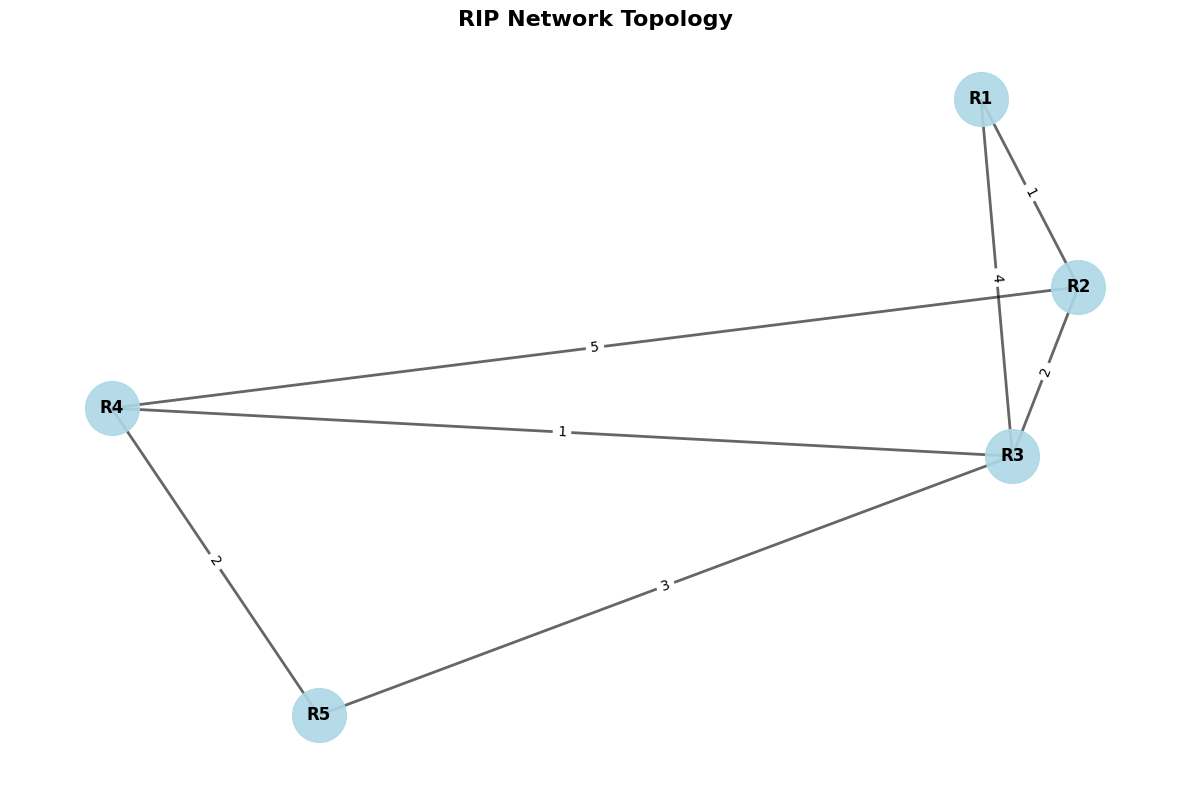

In [5]:
topology = {
    'R1': {'R2': 1, 'R3': 4},
    'R2': {'R1': 1, 'R3': 2, 'R4': 5},
    'R3': {'R1': 4, 'R2': 2, 'R4': 1, 'R5': 3},
    'R4': {'R2': 5, 'R3': 1, 'R5': 2},
    'R5': {'R3': 3, 'R4': 2}
}

visualize_topology(topology)

In [6]:
routers = simulate_rip(topology)

Starting RIP Simulation...

--- Iteration 1 ---

--- Iteration 2 ---

--- Iteration 3 ---

Converged after 3 iterations!

FINAL ROUTING TABLES

Routing Table for Router R1:
--------------------------------------------------
Destination     Cost       Next Hop       
--------------------------------------------------
R1              0          R1             
R2              1          R2             
R3              3          R2             
R4              4          R2             
R5              6          R2             
--------------------------------------------------

Routing Table for Router R2:
--------------------------------------------------
Destination     Cost       Next Hop       
--------------------------------------------------
R1              1          R1             
R2              0          R2             
R3              2          R3             
R4              3          R3             
R5              5          R3             
--------------------------